<a href="https://colab.research.google.com/github/irenedini/learning-fastai/blob/main/breeds_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.3MB/s 
     |████████████████████████████████| 1.0MB 12.1MB/s 
     |████████████████████████████████| 194kB 17.7MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 92kB 8.3MB/s 
     |████████████████████████████████| 40kB 5.4MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 2.6MB 18.6MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision import *
import re

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_10.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_39.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_31.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_88.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_18.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_188.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_166.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_57.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_221.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_71.jpg')...]

In [ ]:
first = (path/'images').ls()[4]
print(first)
re.findall('(.+)_\d+.jpg$', first.name)

/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_18.jpg


['saint_bernard']

In [ ]:
pets_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

pets_dls = pets_db.dataloaders(path/'images')

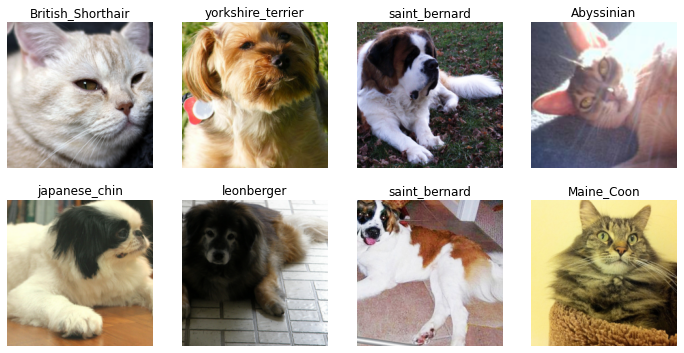

In [ ]:
pets_dls.show_batch(nrows=2, ncols=4)

In [ ]:
learner = cnn_learner(pets_dls, resnet18, metrics=accuracy)
learner.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.623728,0.403075,0.865359,01:29


epoch,train_loss,valid_loss,accuracy,time
0,0.567159,0.351853,0.884303,01:35
1,0.446598,0.342053,0.899188,01:36
2,0.312117,0.281548,0.914750,01:35
3,0.213618,0.264602,0.926928,01:37


In [ ]:
learner = cnn_learner(pets_dls, resnet34, metrics=accuracy)
learner.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.508906,0.386174,0.878214,01:48


epoch,train_loss,valid_loss,accuracy,time
0,0.497779,0.342452,0.891069,02:21
1,0.336303,0.240764,0.932341,02:22


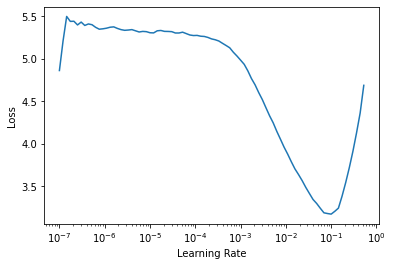

In [ ]:
learner = cnn_learner(pets_dls, resnet34, metrics=accuracy)
lr_min, lr_steep = learner.lr_find()

In [ ]:
learner.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.281362,0.339604,0.900541,01:48


epoch,train_loss,valid_loss,accuracy,time
0,0.549367,0.442834,0.881597,02:22
1,0.322749,0.241456,0.921516,02:21


In [ ]:
learner = cnn_learner(pets_dls, resnet34, metrics=accuracy)
learner.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.141641,0.363805,0.893775,01:48
1,0.503117,0.267288,0.918133,01:49
2,0.329327,0.238143,0.925575,01:48


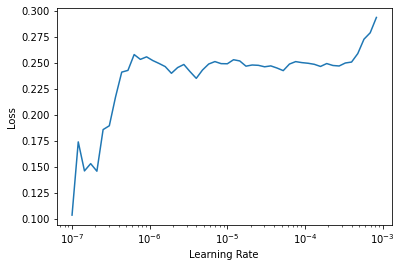

In [ ]:
learner.unfreeze()
lr_min, lr_steep = learner.lr_find()

In [ ]:
learner.fit_one_cycle(6, lr_max=2e-7)

epoch,train_loss,valid_loss,accuracy,time
0,0.271272,0.234743,0.922192,02:21
1,0.262212,0.230397,0.924899,02:21
2,0.258232,0.232959,0.924222,02:21
3,0.257992,0.231504,0.924899,02:21
4,0.249244,0.233537,0.926252,02:22
5,0.255886,0.231089,0.922869,02:22


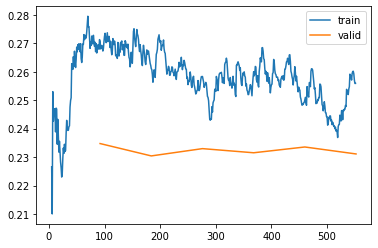

In [ ]:
learner.recorder.plot_loss()

In [ ]:
learner = cnn_learner(pets_dls, resnet34, metrics=accuracy)
learner.fine_tune(9, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,2.588061,0.609362,0.830176,01:48
1,0.933711,0.343084,0.899865,01:49
2,0.547137,0.286570,0.908660,01:49


epoch,train_loss,valid_loss,accuracy,time
0,0.335661,0.256396,0.921516,02:21
1,0.298219,0.321717,0.903248,02:22
2,0.276689,0.304279,0.912720,02:21
3,0.240076,0.311337,0.910690,02:22
4,0.166535,0.280948,0.922869,02:22
5,0.123269,0.255978,0.932341,02:22
6,0.085238,0.266321,0.931664,02:22
7,0.056470,0.239638,0.931664,02:21
8,0.046139,0.236931,0.933694,02:21


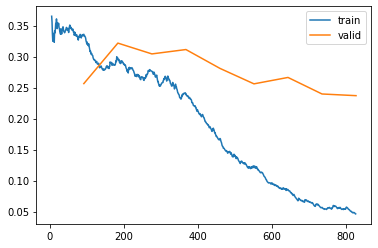

In [ ]:
learner.recorder.plot_loss()

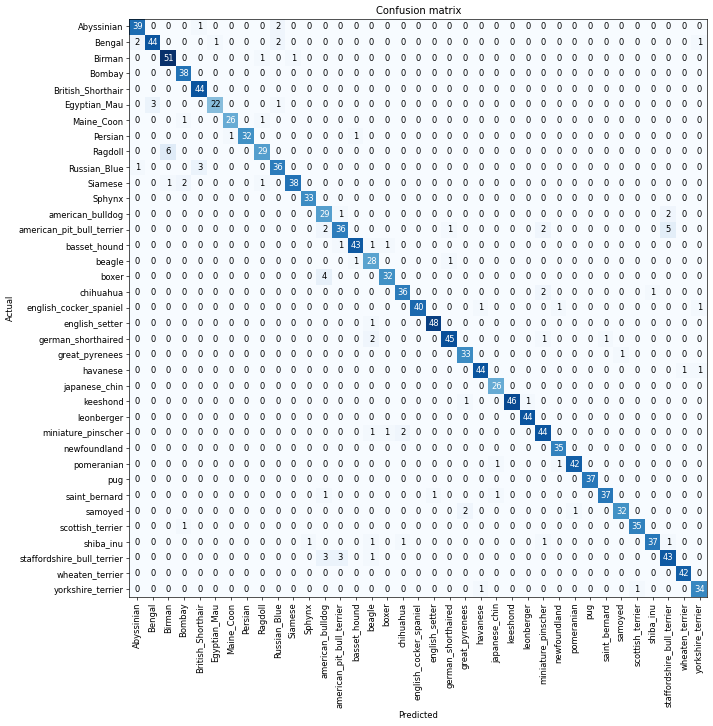

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]